<a href="https://colab.research.google.com/github/georgeputhean/pop-performance/blob/main/Skill_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn.linear_model import LinearRegression

In [174]:
feature=pd.read_csv("/content/Feature_Pop.csv")
target=pd.read_csv("/content/Target_Pop (1).csv")
#get rid of the first column which is useless
target.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
feature.drop(labels=['Unnamed: 0'],axis=1,inplace=True)


In [175]:
feature['Total Score'].unique()

array([ 0, 23, 19, 16, 18, 30, 20, 21, 27, 22, 24, 17, 26, 25])

In [176]:
feature_encoded=pd.get_dummies(feature,columns=['Skill to Improve 1', 'Skill to Improve 2'],drop_first=True)

In [177]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   EGRA Section 1a Score                   349 non-null    int64  
 1   EGRA Section 1b Score                   349 non-null    int64  
 2   EGRA Section 1c Score                   349 non-null    int64  
 3   EGRA Section 2a Score                   349 non-null    int64  
 4   EGRA Section 2b Score                   349 non-null    int64  
 5   EGRA Section 3 Letters Correct          349 non-null    int64  
 6   EGRA Section 3 Time Completed           347 non-null    float64
 7   EGRA Section 3 LPM                      349 non-null    float64
 8   EGRA Section 4 Words Correct            349 non-null    int64  
 9   EGRA Section 4 Time Completed           347 non-null    float64
 10  EGRA Section 4: WPM                     349 non-null    int64 

In [178]:
feature_encoded.columns

Index(['Grade_x', 'School Year_x', 'Pre or Post?',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Read', 'Reads With Others',
       'How Often, ReadsWithOthers', 'Student Gender', 'Q1 Rating or Answer',
       'Q2 Rating', 'Q3 Rating or Answer', 'Q4 Rating or Answer',
       'Q5 Rating or Answer', 'Q6 Rating or Answer', 'Q7 Rating', 'Q8 Rating',
       'Minutes Spent Observing', 'Minutes Spent Coaching', 'Total Score',
       'Teacher Number: Gender',
       'Teacher Number: School Years in Teacher Support Program',
       'Teacher Present', 'Average Students Enrolled',
       'Skill to Improve 1_Communication of Content',
       'Skill to Improve 1_Lesson Objectives',
       'Skill to Improve 1_Lesson Plan Delivery', 'Skill to Improve 1_None',
       'Skill to Improve 1_Patient, Caring and Kind Personality',
       'Skill to Improve 1_Preparation',
       'Skill to Improve 2_Communication of Content',
       'Skill to Improve 2_Lesson Ob

In [179]:
X=feature_encoded[[ 'Grade_x','Pre or Post?',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Read', 'Reads With Others',
       'How Often, ReadsWithOthers', 'Student Gender', 
       'Minutes Spent Observing', 'Minutes Spent Coaching', 'Total Score',
       'Teacher Number: Gender',
       'Teacher Number: School Years in Teacher Support Program',
       'Teacher Present', 'Average Students Enrolled',
       'Skill to Improve 1_Communication of Content',
       'Skill to Improve 1_Lesson Objectives',
       'Skill to Improve 1_Lesson Plan Delivery', 'Skill to Improve 1_None',
       'Skill to Improve 1_Patient, Caring and Kind Personality',
       'Skill to Improve 1_Preparation',
       'Skill to Improve 2_Communication of Content',
       'Skill to Improve 2_Lesson Objectives',
       'Skill to Improve 2_Lesson Plan Delivery', 'Skill to Improve 2_None',
       'Skill to Improve 2_Patient, Caring and Kind Personality',
       'Skill to Improve 2_Preparation', 'Skill to Improve 2_Professionalism']]

In [180]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 28 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Grade_x                                                  349 non-null    int64  
 1   Pre or Post?                                             349 non-null    int64  
 2   Main Language Used In Exam                               349 non-null    int64  
 3   EGRA Question 1: Reading Habit                           349 non-null    int64  
 4   EGRA Last Book Read                                      349 non-null    int64  
 5   Reads With Others                                        349 non-null    int64  
 6   How Often, ReadsWithOthers                               349 non-null    int64  
 7   Student Gender                                           349 non-null    int64  
 8   Minutes Spent Observing       

In [181]:
X[['Grade_x','Pre or Post?',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Read', 'Reads With Others',
       'How Often, ReadsWithOthers', 'Student Gender', 
       'Teacher Number: Gender',
       'Teacher Number: School Years in Teacher Support Program',
       'Teacher Present',
       'Skill to Improve 1_Communication of Content',
       'Skill to Improve 1_Lesson Objectives',
       'Skill to Improve 1_Lesson Plan Delivery', 'Skill to Improve 1_None',
       'Skill to Improve 1_Patient, Caring and Kind Personality',
       'Skill to Improve 1_Preparation',
       'Skill to Improve 2_Communication of Content',
       'Skill to Improve 2_Lesson Objectives',
       'Skill to Improve 2_Lesson Plan Delivery', 'Skill to Improve 2_None',
       'Skill to Improve 2_Patient, Caring and Kind Personality',
       'Skill to Improve 2_Preparation', 'Skill to Improve 2_Professionalism']]=X[['Grade_x','Pre or Post?',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Read', 'Reads With Others',
       'How Often, ReadsWithOthers', 'Student Gender', 
       'Teacher Number: Gender',
       'Teacher Number: School Years in Teacher Support Program',
       'Teacher Present',
       'Skill to Improve 1_Communication of Content',
       'Skill to Improve 1_Lesson Objectives',
       'Skill to Improve 1_Lesson Plan Delivery', 'Skill to Improve 1_None',
       'Skill to Improve 1_Patient, Caring and Kind Personality',
       'Skill to Improve 1_Preparation',
       'Skill to Improve 2_Communication of Content',
       'Skill to Improve 2_Lesson Objectives',
       'Skill to Improve 2_Lesson Plan Delivery', 'Skill to Improve 2_None',
       'Skill to Improve 2_Patient, Caring and Kind Personality',
       'Skill to Improve 2_Preparation', 'Skill to Improve 2_Professionalism']].apply(lambda x: x.astype('category'))

In [182]:
X1=X.filter(like='Skill to Improve')

In [183]:
X['Pre or Post?'].value_counts()

1    348
0      1
Name: Pre or Post?, dtype: int64

In [184]:
feature_encoded

,Grade_x,School Year_x,Pre or Post?,Main Language Used In Exam,EGRA Question 1: Reading Habit,EGRA Last Book Read,Reads With Others,"How Often, ReadsWithOthers",Student Gender,Q1 Rating or Answer,...,Skill to Improve 1_None,"Skill to Improve 1_Patient, Caring and Kind Personality",Skill to Improve 1_Preparation,Skill to Improve 2_Communication of Content,Skill to Improve 2_Lesson Objectives,Skill to Improve 2_Lesson Plan Delivery,Skill to Improve 2_None,"Skill to Improve 2_Patient, Caring and Kind Personality",Skill to Improve 2_Preparation,Skill to Improve 2_Professionalism
0,5,2021,1,2,1,1,1,1,1,0,...,1,0,0,0,0,0,1,0,0,0
1,5,2021,1,2,1,1,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,5,2021,1,2,1,1,1,2,0,0,...,1,0,0,0,0,0,1,0,0,0
3,5,2021,1,3,1,1,1,3,0,0,...,1,0,0,0,0,0,1,0,0,0
4,5,2021,1,3,1,1,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,5,2021,1,3,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
345,5,2021,1,2,1,1,1,3,0,0,...,1,0,0,0,0,0,1,0,0,0
346,5,2021,1,3,0,1,1,2,1,0,...,1,0,0,0,0,0,1,0,0,0
347,5,2021,1,3,1,1,1,3,1,0,...,1,0,0,0,0,0,1,0,0,0


In [185]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 28 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   Grade_x                                                  349 non-null    category
 1   Pre or Post?                                             349 non-null    category
 2   Main Language Used In Exam                               349 non-null    category
 3   EGRA Question 1: Reading Habit                           349 non-null    category
 4   EGRA Last Book Read                                      349 non-null    category
 5   Reads With Others                                        349 non-null    category
 6   How Often, ReadsWithOthers                               349 non-null    category
 7   Student Gender                                           349 non-null    category
 8   Minutes Spent Observ

In [186]:
X[['Minutes Spent Observing', 'Minutes Spent Coaching']].isnull().sum(axis = 1)#=X[['Minutes Spent Observing', 'Minutes Spent Coaching']]

0      0
1      0
2      0
3      0
4      0
      ..
344    0
345    0
346    0
347    0
348    0
Length: 349, dtype: int64

In [187]:
y=target['EGRA Section 5 CWPM']
x=X1

37.87-> root mean square error


Text(0.5, 1.0, 'Feature Importance')

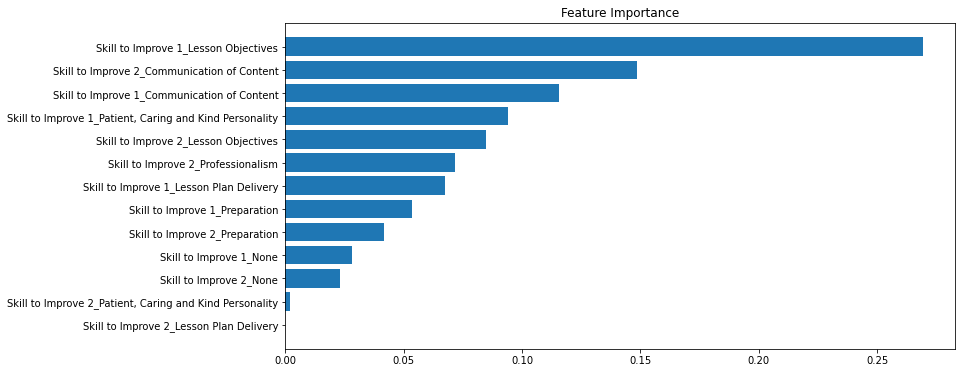

In [188]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1066)
model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500, min_samples_split=5, n_iter_no_change=10)
model.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print("{:.2f}-> root mean square error".format(rmse))
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [189]:
x=X
y=target['EGRA Section 5 CWPM']

26.60-> root mean square error


Text(0.5, 1.0, 'Feature Importance')

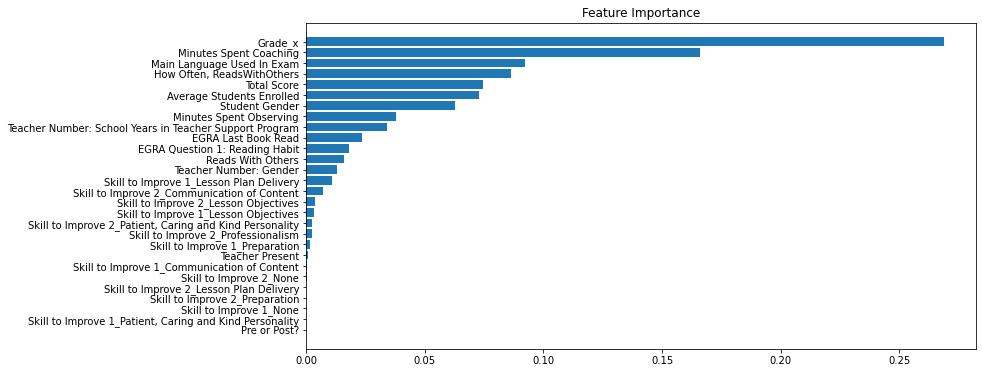

In [190]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1066)
model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500, min_samples_split=5, n_iter_no_change=10)
model.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print("{:.2f}-> root mean square error".format(rmse))
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [191]:
y=target['Cumulative Score']
x=X

139.03-> root mean square error


Text(0.5, 1.0, 'Feature Importance')

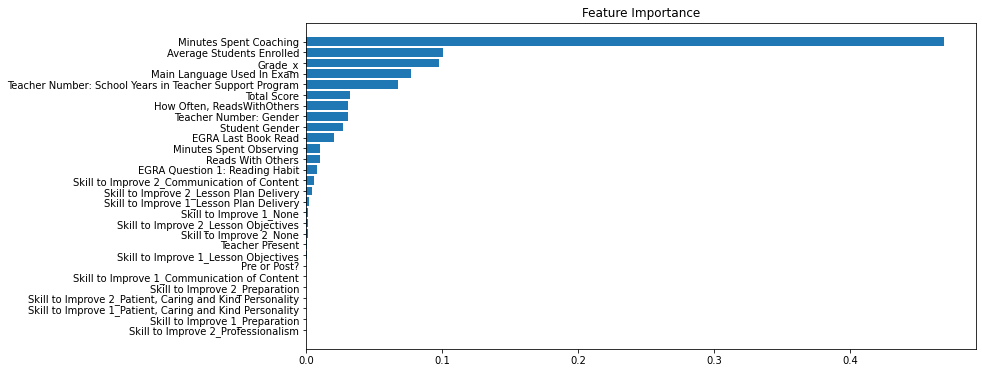

In [192]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1066)
model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500, min_samples_split=5, n_iter_no_change=10)
model.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print("{:.2f}-> root mean square error".format(rmse))
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Text(0.5, 1.0, 'Permutation Importance')

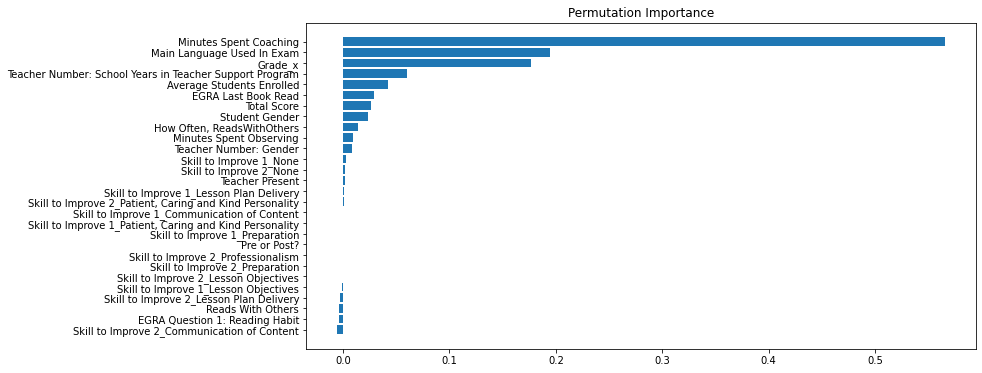

In [193]:

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')


In [194]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'SHAP Importance')

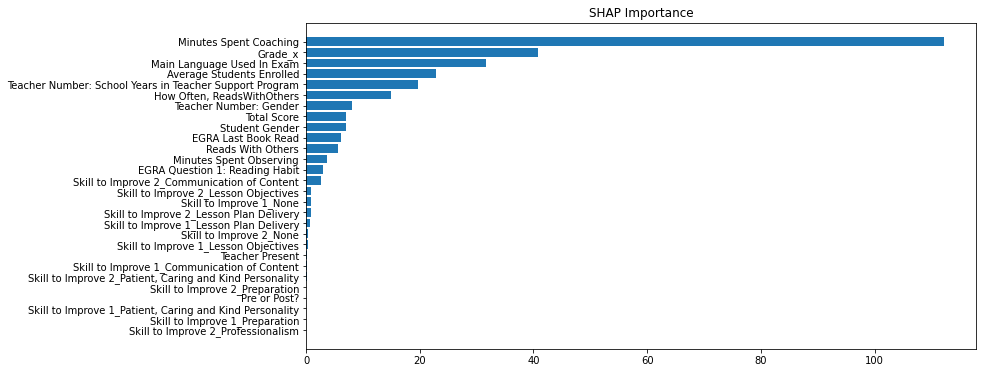

In [195]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance')


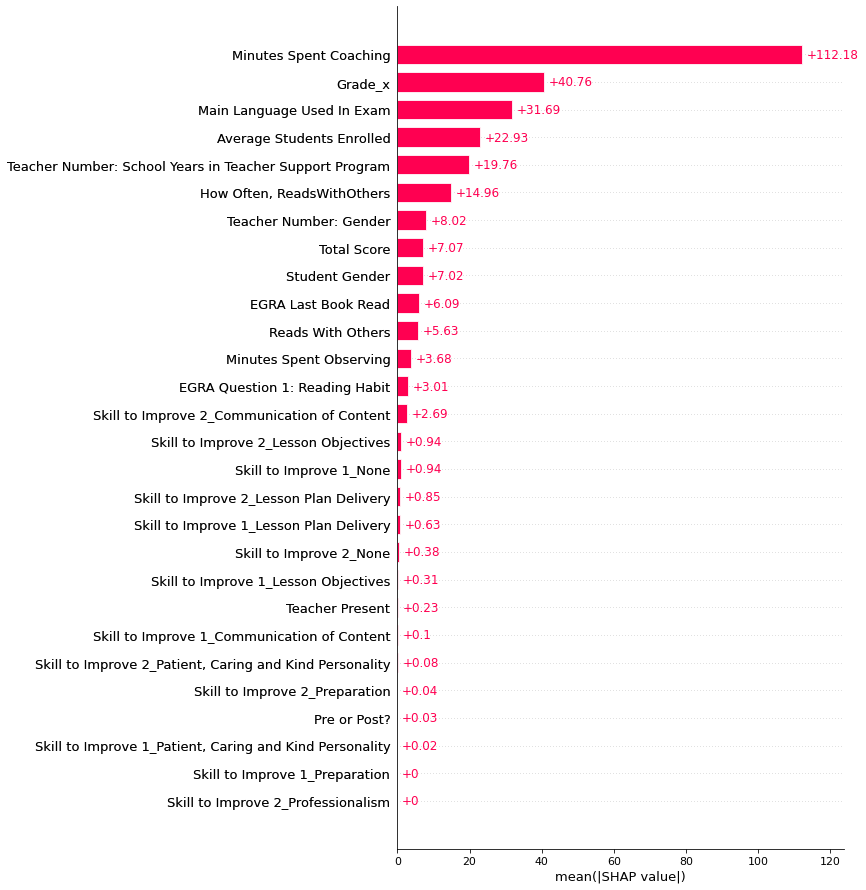

In [196]:

shap.plots.bar(shap_values, max_display=X_test.shape[0])
